Academic Integrity Statement

**"We certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I we did not receive any external help, coaching or contributions during the production of this work."**

In [5]:
from google.colab import drive
drive.mount('/content/drive/')
data='/content/drive/MyDrive/Assignment 3/income_dataset.csv'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [6]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import sklearn
%matplotlib inline

df= pd.read_csv(data)
df= pd.DataFrame(df)
df.head(10)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053.0,HS-grad,9,Widowed,?,Not-in-family,0,4356,40,United-States,<=50K
1,82,Private,186061.0,HS-grad,9,Widowed,Exec-managerial,Not-in-family,0,4356,18,United-States,<=50K
2,66,?,NaN,Some-college,10,Widowed,?,Unmarried,0,4356,40,United-States,<=50K
3,54,Private,140359.0,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,0,3900,40,United-States,<=50K
4,41,Private,264663.0,Some-college,10,Separated,Prof-specialty,Own-child,0,3900,40,United-States,<=50K
5,34,Private,216864.0,HS-grad,9,Divorced,Other-service,Unmarried,0,3770,45,United-States,<=50K
6,38,Private,150601.0,10th,6,Separated,Adm-clerical,Unmarried,0,3770,40,United-States,<=50K
7,74,State-gov,88638.0,Doctorate,16,Never-married,Prof-specialty,Other-relative,0,3683,20,United-States,>50K
8,68,Federal-gov,422013.0,HS-grad,9,Divorced,Prof-specialty,Not-in-family,0,3683,40,United-States,<=50K
9,41,Private,70037.0,Some-college,10,Never-married,Craft-repair,Unmarried,0,3004,60,?,>50K


In [7]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256000e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897801e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055511e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178242e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f877de62e10>,
      dtype=object)

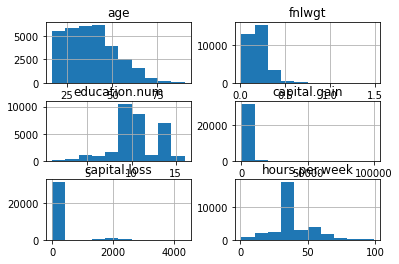

In [8]:
df.hist()

In [9]:
df=df.rename(columns=({'native.country':'nativeCountry','education.num':'educationNum','marital.status':'maritalStatus','capital.gain':'capitalGain','capital.loss':'capitalLoss','hours.per.week':'hoursPerWeek'}))
df = df[df.workclass != '?']
df = df[df.occupation != '?']
df = df[df.nativeCountry != '?']
df

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
1,82,Private,186061.0,HS-grad,9,Widowed,Exec-managerial,Not-in-family,0,4356,18,United-States,<=50K
3,54,Private,140359.0,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,0,3900,40,United-States,<=50K
4,41,Private,264663.0,Some-college,10,Separated,Prof-specialty,Own-child,0,3900,40,United-States,<=50K
5,34,Private,216864.0,HS-grad,9,Divorced,Other-service,Unmarried,0,3770,45,United-States,<=50K
6,38,Private,150601.0,10th,6,Separated,Adm-clerical,Unmarried,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152.0,Some-college,10,Never-married,Protective-serv,Not-in-family,0,0,40,United-States,<=50K
32557,27,Private,257302.0,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,0,0,38,United-States,<=50K
32558,40,Private,154374.0,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,0,0,40,United-States,>50K
32559,58,Private,151910.0,HS-grad,9,Widowed,Adm-clerical,Unmarried,0,0,40,United-States,<=50K


In [10]:
df.dtypes

age                int64
workclass         object
fnlwgt           float64
education         object
educationNum       int64
maritalStatus     object
occupation        object
relationship      object
capitalGain        int64
capitalLoss        int64
hoursPerWeek       int64
nativeCountry     object
income            object
dtype: object

In [11]:
df.isnull().sum(axis=0)

age              0
workclass        0
fnlwgt           0
education        0
educationNum     0
maritalStatus    0
occupation       0
relationship     0
capitalGain      0
capitalLoss      0
hoursPerWeek     0
nativeCountry    0
income           0
dtype: int64

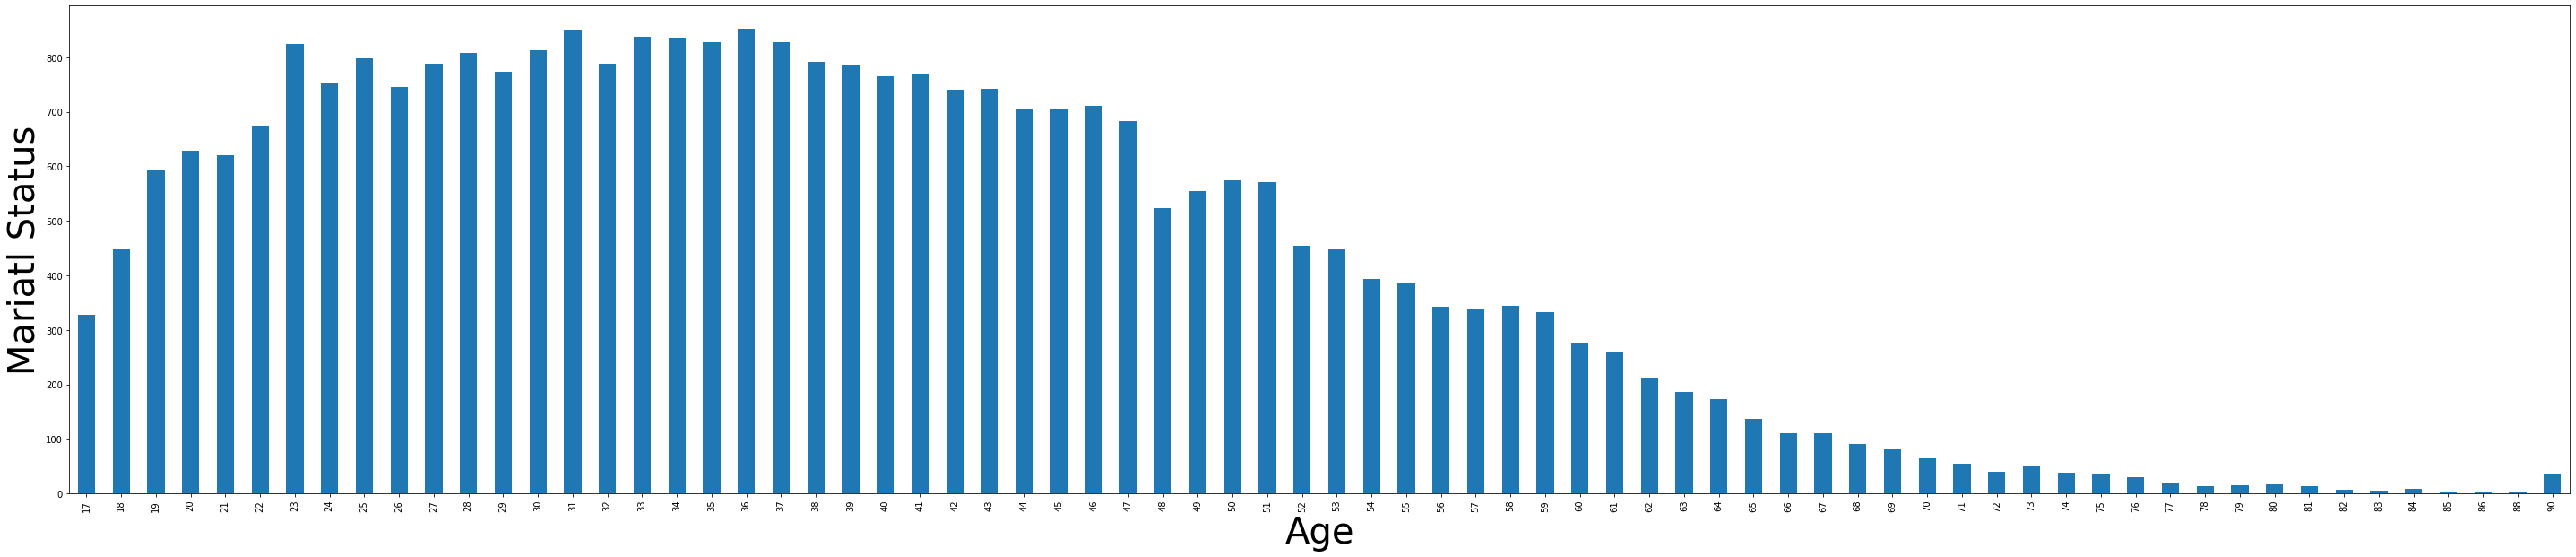

In [12]:
df.groupby('age')['maritalStatus'].count().plot.bar(figsize=(50,10))
plt.ylabel('Mariatl Status',fontsize=40)
plt.xlabel('Age',fontsize=40)
plt.show()

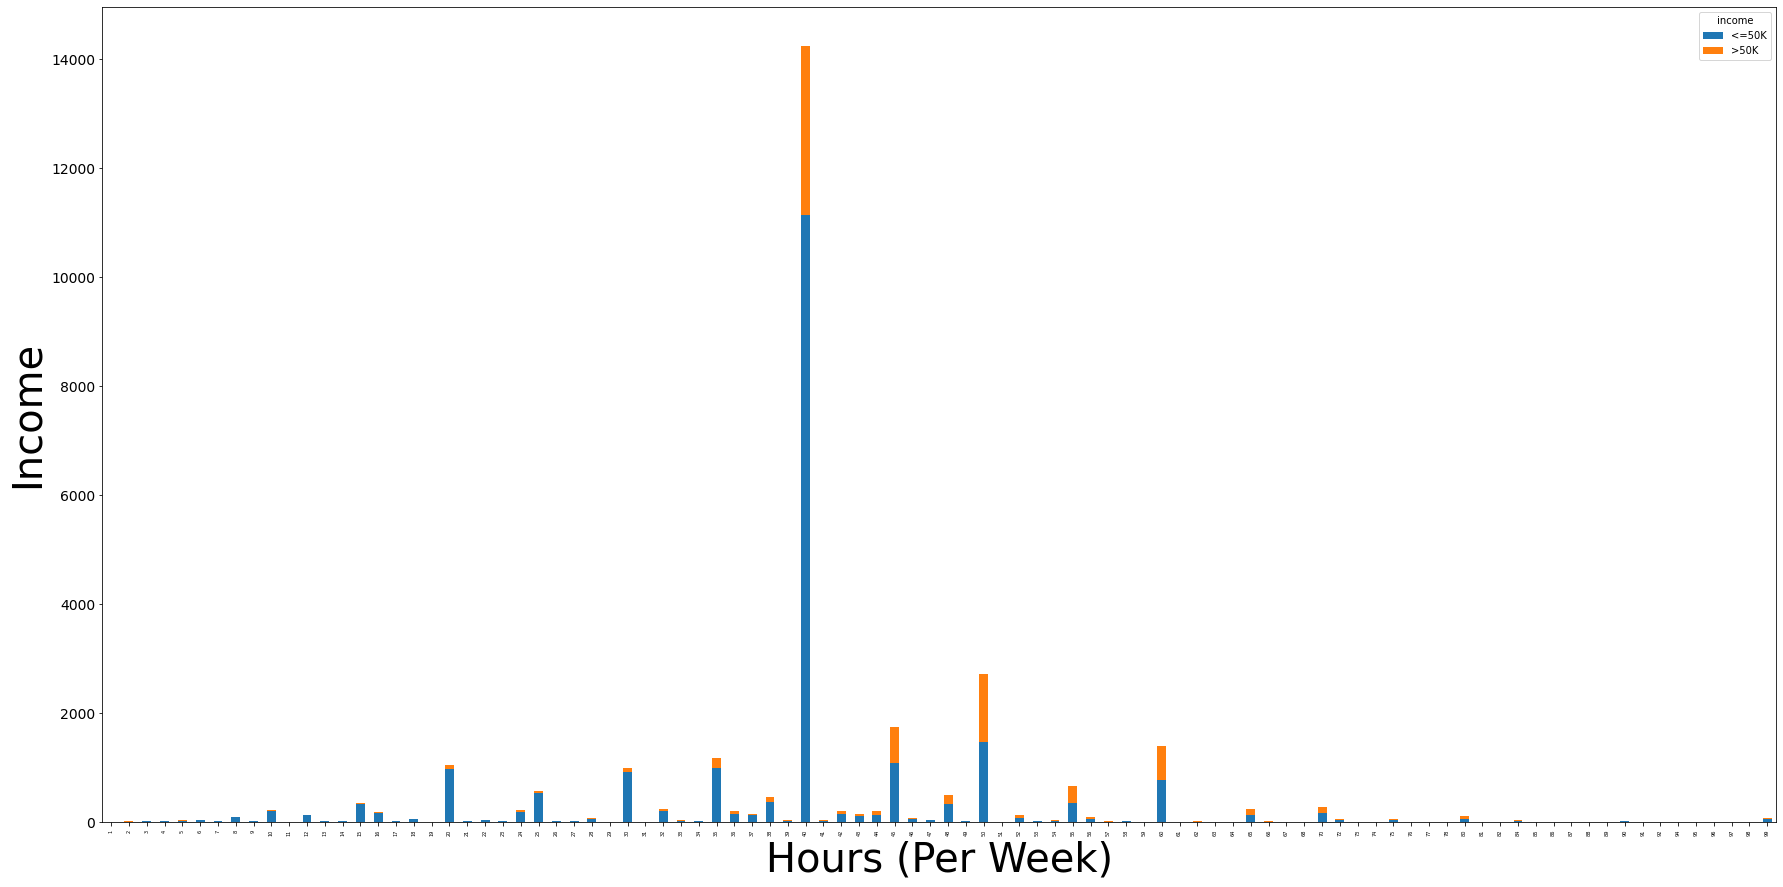

In [13]:
df.groupby(['hoursPerWeek','income',]).size().unstack().plot(kind='bar',stacked=True,figsize=(30, 15),fontsize=14)
plt.ylabel('Income',fontsize=40)
plt.xlabel('Hours (Per Week)',fontsize=40)
plt.xticks(fontsize=5)
plt.show()

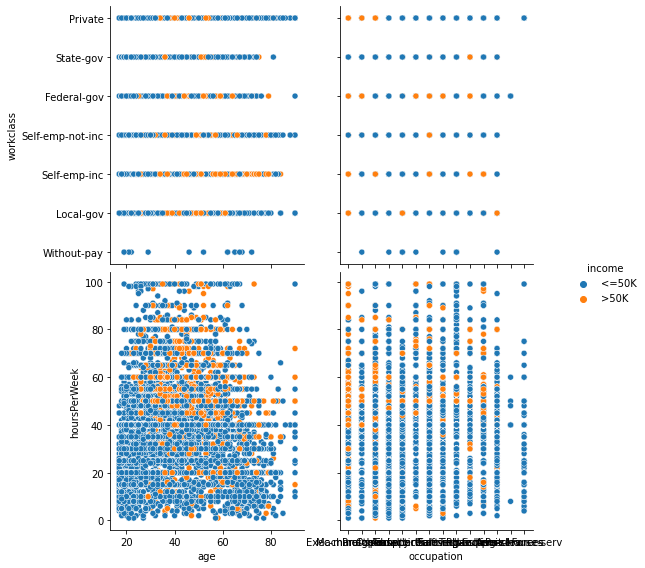

In [14]:
x= sns.pairplot(df,
                x_vars=["age","occupation"],
                y_vars=["workclass","hoursPerWeek"],
                hue = 'income',
                diag_kind = 'kde', 
                height = 4);

In [15]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

for col in df.columns:
    if df[col].dtypes == 'object' or df[col].dtypes == 'category' :
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
df

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
1,82,2,186061.0,11,9,6,3,1,0,4356,18,38,0
3,54,2,140359.0,5,4,0,6,4,0,3900,40,38,0
4,41,2,264663.0,15,10,5,9,3,0,3900,40,38,0
5,34,2,216864.0,11,9,0,7,4,0,3770,45,38,0
6,38,2,150601.0,0,6,5,0,4,0,3770,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,2,310152.0,15,10,4,10,1,0,0,40,38,0
32557,27,2,257302.0,7,12,2,12,5,0,0,38,38,0
32558,40,2,154374.0,11,9,2,6,0,0,0,40,38,1
32559,58,2,151910.0,11,9,6,0,4,0,0,40,38,0


In [16]:
df.drop(['fnlwgt','education'],axis=1,inplace=True)

In [17]:
# Converting the object datatype to category
df['workclass'] = df.workclass.astype('category')
df['maritalStatus'] = df.maritalStatus.astype('category')
df['occupation'] = df.occupation.astype('category')
df['relationship'] = df.relationship.astype('category')
df['nativeCountry'] = df.nativeCountry.astype('category')
df['income'] = df.income.astype('category')

In [18]:
df.dtypes

age                 int64
workclass        category
educationNum        int64
maritalStatus    category
occupation       category
relationship     category
capitalGain         int64
capitalLoss         int64
hoursPerWeek        int64
nativeCountry    category
income           category
dtype: object

In [19]:
# Normalizing the values
def normalize(X):
    return (X - X.min(axis=0)) / (X.max(axis=0)-X.min(axis=0))
df['age'] = normalize(df['age'])
df['educationNum'] = normalize(df['educationNum'])
df['capitalGain'] = normalize(df['capitalGain'])
df['capitalLoss'] = normalize(df['capitalLoss'])
df['hoursPerWeek'] = normalize(df['hoursPerWeek'])

In [20]:
df['income'].replace(('<=50K', '>50K'), (0, 1), inplace = True)
df

,age,workclass,educationNum,maritalStatus,occupation,relationship,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
1,0.890411,2,0.533333,6,3,1,0.0,1.000000,0.173469,38,0
3,0.506849,2,0.200000,0,6,4,0.0,0.895317,0.397959,38,0
4,0.328767,2,0.600000,5,9,3,0.0,0.895317,0.397959,38,0
5,0.232877,2,0.533333,0,7,4,0.0,0.865473,0.448980,38,0
6,0.287671,2,0.333333,5,0,4,0.0,0.865473,0.397959,38,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,0.068493,2,0.600000,4,10,1,0.0,0.000000,0.397959,38,0
32557,0.136986,2,0.733333,2,12,5,0.0,0.000000,0.377551,38,0
32558,0.315068,2,0.533333,2,6,0,0.0,0.000000,0.397959,38,1
32559,0.561644,2,0.533333,6,0,4,0.0,0.000000,0.397959,38,0


In [21]:
for x in df.columns:
    #prinfting unique values
    print(x ,':', len(df[x].unique()))

age : 72
workclass : 7
educationNum : 16
maritalStatus : 7
occupation : 14
relationship : 6
capitalGain : 118
capitalLoss : 90
hoursPerWeek : 94
nativeCountry : 41
income : 2


In [22]:

layer = tf.keras.layers.CategoryEncoding(num_tokens=4, output_mode="multi_hot")

In [23]:
from keras.optimizers import gradient_descent_v2

In [24]:
#Splitting the dataset into Input(Features) and Output(Labels)
dataset = df.values
X = dataset[:,0:10]
Y = dataset[:,10]

In [25]:
# Scaling the Min-Max value
scaler = preprocessing.MinMaxScaler()
X1 = scaler.fit_transform(X) #X1 is the scaled value of X
X1

array([[0.89041096, 0.33333333, 0.53333333, ..., 1.        , 0.17346939,
        0.95      ],
       [0.50684932, 0.33333333, 0.2       , ..., 0.8953168 , 0.39795918,
        0.95      ],
       [0.32876712, 0.33333333, 0.6       , ..., 0.8953168 , 0.39795918,
        0.95      ],
       ...,
       [0.31506849, 0.33333333, 0.53333333, ..., 0.        , 0.39795918,
        0.95      ],
       [0.56164384, 0.33333333, 0.53333333, ..., 0.        , 0.39795918,
        0.95      ],
       [0.06849315, 0.33333333, 0.53333333, ..., 0.        , 0.19387755,
        0.95      ]])

In [26]:

#Splitting the dataset into test and train
from sklearn.model_selection import train_test_split

X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(X1, Y, test_size=0.2)

X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test, test_size=0.5)

print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)


(24129, 10) (3016, 10) (3017, 10) (24129,) (3016,) (3017,)


Model 1 - 1 hidden layer


In [183]:

#Setting up the Architecture
from keras.models import Sequential
from keras.layers import Dense
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid'),
])


In [184]:
# Training the data
#Filling in the best numbers
# Model 1
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist = model.fit(X_train, y_train,
          batch_size=32, epochs=50,
          validation_data=(X_val, y_val))

Epoch 1/50
755/755 [==============================] - 3s 3ms/step - loss: 0.5780 - accuracy: 0.7337 - val_loss: 0.5406 - val_accuracy: 0.7513
Epoch 2/50
755/755 [==============================] - 2s 2ms/step - loss: 0.5383 - accuracy: 0.7520 - val_loss: 0.5197 - val_accuracy: 0.7513
Epoch 3/50
755/755 [==============================] - 2s 2ms/step - loss: 0.5223 - accuracy: 0.7521 - val_loss: 0.5000 - val_accuracy: 0.7513
Epoch 4/50
755/755 [==============================] - 3s 4ms/step - loss: 0.5110 - accuracy: 0.7522 - val_loss: 0.4847 - val_accuracy: 0.7513
Epoch 5/50
755/755 [==============================] - 2s 3ms/step - loss: 0.4992 - accuracy: 0.7522 - val_loss: 0.4720 - val_accuracy: 0.7513
Epoch 6/50
755/755 [==============================] - 2s 2ms/step - loss: 0.4889 - accuracy: 0.7549 - val_loss: 0.4617 - val_accuracy: 0.7513
Epoch 7/50
755/755 [==============================] - 2s 2ms/step - loss: 0.4818 - accuracy: 0.7589 - val_loss: 0.4536 - val_accuracy: 0.7513
Epoch 

In [186]:
#testing the data
model.evaluate(X_test, y_test)[1]


95/95 [==============================] - 0s 2ms/step - loss: 0.3779 - accuracy: 0.8194


0.8193569779396057

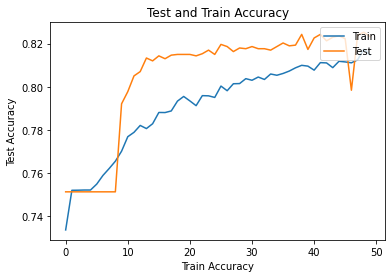

In [188]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Test and Train Accuracy')
plt.ylabel('Test Accuracy')
plt.xlabel('Train Accuracy')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

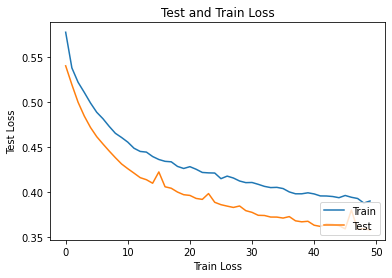

In [189]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Test and Train Loss')
plt.ylabel('Test Loss')
plt.xlabel('Train Loss')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()




PART 2: Optimizing Neural Network

> Indented block



Model 2- 3 hidden layers

In [190]:
# Model 2
model_2 = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])



In [191]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_2 = model_2.fit(X_train, y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, y_val))

Epoch 1/100
755/755 [==============================] - 3s 3ms/step - loss: 0.4070 - accuracy: 0.8063 - val_loss: 0.3459 - val_accuracy: 0.8319
Epoch 2/100
755/755 [==============================] - 2s 3ms/step - loss: 0.3483 - accuracy: 0.8362 - val_loss: 0.3415 - val_accuracy: 0.8345
Epoch 3/100
755/755 [==============================] - 2s 3ms/step - loss: 0.3429 - accuracy: 0.8384 - val_loss: 0.3330 - val_accuracy: 0.8372
Epoch 4/100
755/755 [==============================] - 2s 3ms/step - loss: 0.3392 - accuracy: 0.8404 - val_loss: 0.3279 - val_accuracy: 0.8412
Epoch 5/100
755/755 [==============================] - 2s 3ms/step - loss: 0.3362 - accuracy: 0.8416 - val_loss: 0.3348 - val_accuracy: 0.8382
Epoch 6/100
755/755 [==============================] - 2s 3ms/step - loss: 0.3367 - accuracy: 0.8419 - val_loss: 0.3416 - val_accuracy: 0.8365
Epoch 7/100
755/755 [==============================] - 2s 3ms/step - loss: 0.3362 - accuracy: 0.8419 - val_loss: 0.3329 - val_accuracy: 0.8402

In [192]:
model_2.evaluate(X_test, y_test)[1]

95/95 [==============================] - 0s 2ms/step - loss: 0.3401 - accuracy: 0.8492


0.8491879105567932

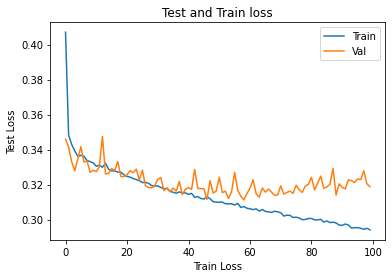

In [193]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Test and Train loss')
plt.ylabel('Test Loss')
plt.xlabel('Train Loss')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

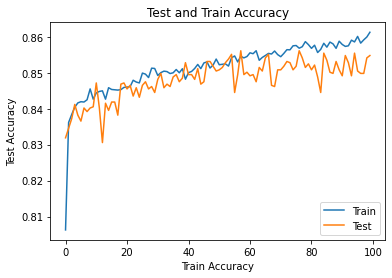

In [194]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Test and Train Accuracy')
plt.ylabel('Test Accuracy')
plt.xlabel('Train Accuracy')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

Model 3 - 2 hidden layer

In [197]:
# Model 3
from keras.layers import Dropout
from keras import regularizers

model_3 = Sequential([
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

              


In [198]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_3 = model_3.fit(X_train, y_train,
          batch_size=100, epochs=100,
          validation_data=(X_val,y_val))

Epoch 1/100
242/242 [==============================] - 2s 4ms/step - loss: 0.9536 - accuracy: 0.7351 - val_loss: 0.6660 - val_accuracy: 0.7513
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6096 - accuracy: 0.7520 - val_loss: 0.5623 - val_accuracy: 0.7513
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5611 - accuracy: 0.7520 - val_loss: 0.5446 - val_accuracy: 0.7513
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5528 - accuracy: 0.7520 - val_loss: 0.5397 - val_accuracy: 0.7513
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5480 - accuracy: 0.7520 - val_loss: 0.5368 - val_accuracy: 0.7513
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5469 - accuracy: 0.7520 - val_loss: 0.5348 - val_accuracy: 0.7513
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5443 - accuracy: 0.7520 - val_loss: 0.5337 - val_accuracy: 0.7513

In [ ]:
model_3.evaluate(X_test, y_test)

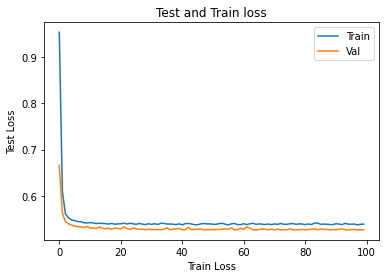

In [200]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Test and Train loss')
plt.ylabel('Test Loss')
plt.xlabel('Train Loss')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

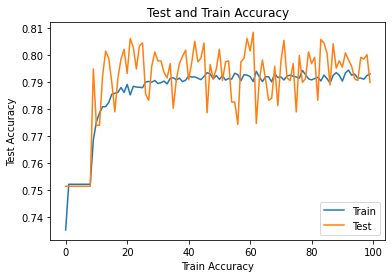

In [202]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Test and Train Accuracy')
plt.ylabel('Test Accuracy')
plt.xlabel('Train Accuracy')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

Improvement **methods**


In [27]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from keras.regularizers import l2
np.random.seed(3)

In [29]:
x_val = X_train[50:]
y_val = y_train[50:]

In [30]:
x_val = x_val / 255.0

In [31]:
x_val = x_val.astype("float32")

In [32]:
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

In [33]:
model = Sequential()
model.add(Dense(units = 50, input_shape=(10,) , activation = "relu", kernel_regularizer=l2(0.01)))
model.add(Dense(units = 30, activation= "relu", kernel_regularizer=l2(0.01)))
model.add(Dense(units= 10, activation="relu",kernel_regularizer=l2(0.01)))
model.add(Dense(units= 2, activation="softmax",kernel_regularizer=l2(0.01)))

model.compile(loss = "categorical_crossentropy", optimizer= "adam", metrics=["accuracy"])

In [34]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=20)
hist = model.fit(X_train, y_train, epochs=10, batch_size=32, 
                 validation_data=(x_val, y_val),callbacks=[early_stopping])

Epoch 1/10
755/755 [==============================] - 4s 4ms/step - loss: 0.6728 - accuracy: 0.7764 - val_loss: 0.6916 - val_accuracy: 0.7505
Epoch 2/10
755/755 [==============================] - 3s 4ms/step - loss: 0.5270 - accuracy: 0.8021 - val_loss: 0.8537 - val_accuracy: 0.7505
Epoch 3/10
755/755 [==============================] - 3s 4ms/step - loss: 0.5149 - accuracy: 0.8092 - val_loss: 0.9282 - val_accuracy: 0.7505
Epoch 4/10
755/755 [==============================] - 3s 4ms/step - loss: 0.5104 - accuracy: 0.8128 - val_loss: 0.9585 - val_accuracy: 0.7505
Epoch 5/10
755/755 [==============================] - 3s 4ms/step - loss: 0.5087 - accuracy: 0.8116 - val_loss: 0.9439 - val_accuracy: 0.7505
Epoch 6/10
755/755 [==============================] - 3s 4ms/step - loss: 0.5069 - accuracy: 0.8122 - val_loss: 0.9677 - val_accuracy: 0.7505
Epoch 7/10
755/755 [==============================] - 3s 4ms/step - loss: 0.5075 - accuracy: 0.8113 - val_loss: 0.9937 - val_accuracy: 0.7505
Epoch 

In [36]:
model.evaluate(X_test, y_test)

95/95 [==============================] - 0s 4ms/step - loss: 0.5116 - accuracy: 0.8230


[0.5116455554962158, 0.8230029940605164]

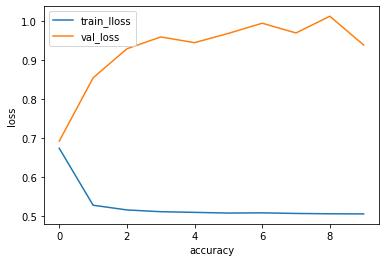

In [37]:

plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.ylabel('loss')
plt.xlabel('accuracy')
plt.legend(['train_lloss','val_loss'],loc='upper left')
plt.show()

In [39]:
def modelkfold():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(10, input_shape=(10,) , activation = 'relu'))
  model.add(tf.keras.layers.Dense(10, activation = 'relu'))
  model.add(tf.keras.layers.Dense(10, activation = 'relu'))
  model.add(tf.keras.layers.Dense(10, activation = 'relu'))
  model.add(tf.keras.layers.Dense(3, activation = 'softmax'))

  model.compile(loss = 'sparse_categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )

  return model

In [40]:
from sklearn.model_selection import KFold

n_split=3

for train_index,test_index in KFold(n_split).split(X):
  X_train,X_test=X[train_index],X[test_index]
  y_train,y_test=Y[train_index],Y[test_index]
  
  model= modelkfold()
  model.fit(X_train, y_train,epochs=20)
  
  

Epoch 1/20
629/629 [==============================] - 4s 5ms/step - loss: 0.5062 - accuracy: 0.8001
Epoch 2/20
629/629 [==============================] - 3s 5ms/step - loss: 0.4293 - accuracy: 0.8049
Epoch 3/20
629/629 [==============================] - 2s 3ms/step - loss: 0.3906 - accuracy: 0.8193
Epoch 4/20
629/629 [==============================] - 2s 3ms/step - loss: 0.3707 - accuracy: 0.8268
Epoch 5/20
629/629 [==============================] - 2s 3ms/step - loss: 0.3605 - accuracy: 0.8304
Epoch 6/20
629/629 [==============================] - 2s 3ms/step - loss: 0.3572 - accuracy: 0.8315
Epoch 7/20
629/629 [==============================] - 2s 3ms/step - loss: 0.3515 - accuracy: 0.8375
Epoch 8/20
629/629 [==============================] - 2s 3ms/step - loss: 0.3501 - accuracy: 0.8337
Epoch 9/20
629/629 [==============================] - 2s 3ms/step - loss: 0.3470 - accuracy: 0.8353
Epoch 10/20
629/629 [==============================] - 2s 3ms/step - loss: 0.3474 - accuracy: 0.8361

In [41]:
model.evaluate(X_test, y_test)

315/315 [==============================] - 1s 2ms/step - loss: 0.3628 - accuracy: 0.8314


[0.36284276843070984, 0.8314104080200195]